In [1]:
import json
import base64
import datetime
import requests

import pandas as pd
import flask
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools


In [11]:
!pip install newsapi-python

In [2]:
from newsapi.newsapi_client import NewsApiClient



In [14]:

def generate_news_table(dataframe, max_rows=10):
    return html.Div(
        [
            html.Div(
                html.Table(
                    # Header
                    [html.Tr([html.Th()])]
                    +
                    # Body
                    [
                        html.Tr(
                            [
                                html.Td(
                                    html.A(
                                        dataframe.iloc[i]["title"],
                                        href=dataframe.iloc[i]["url"],
                                        target="_blank",
                                    )
                                )
                            ]
                        )
                        for i in range(min(len(dataframe), max_rows))
                    ]
                ),
                style={"height": "150px", "overflowY": "scroll"},
            ),
            html.P(
                "Last update : " + datetime.datetime.now().strftime("%H:%M:%S"),
                style={"fontSize": "11", "marginTop": "4", "color": "#45df7e"},
            ),
        ],
        style={"height": "100%"},
    )

# retrieve and displays news 
def update_news():
    r = requests.get('https://newsapi.org/v2/top-headlines?country=us&category=business&apiKey=c7ece947bed84fefa518b875c951322e')
    json_data = r.json()["articles"]
    df = pd.DataFrame(json_data)
    df = pd.DataFrame(df[["title","url"]])
    return df

# app.layout = html.Div([
#                     html.P('Headlines',style={"fontSize":"13","color":"#45df7e"}),
#                     html.Div(update_news(),id="news")
#                     ],
#                     style={
#                         "height":"33%",
#                         "backgroundColor": "#18252E",
#                         "color": "white",
#                         "fontSize": "12",
#                         "padding":"10px 10px 0px 10px",
#                         "marginTop":"5",
#                         "marginBottom":"0"
#                     })


In [15]:
df

NameError: name 'df' is not defined

In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

r = requests.get('https://newsapi.org/v2/top-headlines?country=us&category=business&apiKey=c7ece947bed84fefa518b875c951322e')
json_data = r.json()["articles"]
df = pd.DataFrame(json_data)
df = pd.DataFrame(df[["title","url"]])

def generate_table(dataframe, max_rows=10):
    return html.Table(
        # Header
        [html.Tr([html.Th(col) for col in dataframe.columns])] +

        # Body
        [html.Tr([
            html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
        ]) for i in range(min(len(dataframe), max_rows))]
    )


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H4(children='US Agriculture Exports (2011)'),
    generate_table(df)
])

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Debugger PIN: 781-415-411
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [46]:

update_news()

Div(children=[Div(children=Table([Tr([Th(None)]), Tr([Td(A(children='More than 17000 without power in Douglas and Sarpy Counties - Omaha World-Herald', href='https://www.omaha.com/news/metro/more-than-without-power-in-douglas-and-sarpy-counties/article_15e56243-860f-591a-86ba-364c5b1275bb.html', target='_blank'))]), Tr([Td(A(children='US may soften ban on Huawei to help existing users - Engadget', href='https://www.engadget.com/2019/05/18/us-may-soften-ban-on-huawei/', target='_blank'))]), Tr([Td(A(children='Despite Bitcoin (BTC) Stagnation, Economist Has High Hopes For The Crypto - newsBTC', href='https://www.newsbtc.com/2019/05/18/bitcoin-stagnation-economist-high-hopes-crypto/', target='_blank'))]), Tr([Td(A(children='Lockheed Martin, in a Dogfight With Boeing, Puts the F-35 on Sale - Yahoo Finance', href='https://finance.yahoo.com/news/lockheed-martin-dogfight-boeing-puts-162100151.html', target='_blank'))]), Tr([Td(A(children="Iran's economy is sucking wind - Fox Business", href='

In [49]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [57]:
ts = TimeSeries(key='X5AYBIDIH2EVGNW9', output_format='pandas')
df, meta_data = ts.get_daily(symbol='DJIA', outputsize='compact')
stock.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2000-01-03,11501.8496,11522.0098,11305.6904,11357.5098,169750000.0
2000-01-04,11349.7500,11350.0596,10986.4502,10997.9297,178420000.0
2000-01-05,10989.3701,11215.0996,10938.6699,11122.6504,203190000.0
2000-01-06,11113.3701,11313.4502,11098.4502,11253.2598,176550000.0
2000-01-07,11247.0596,11528.1396,11239.9199,11522.5596,184900000.0


In [12]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
from datetime import datetime

trace = go.Candlestick(x=df.index,
                open=df['1. open'],
                high=df['2. high'],
                low=df['3. low'],
                close=df['4. close'],
                increasing=dict(line=dict(color= '#17BECF')),
                decreasing=dict(line=dict(color= '#7F7F7F')))
data = [trace]
py.iplot(data, filename='simple_candlestick')


KeyError: '1. open'

In [3]:
# Python
import pandas as pd
from fbprophet import Prophet

In [24]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [25]:
ts = TimeSeries(key='X5AYBIDIH2EVGNW9', output_format='pandas')

In [113]:
stock, meta_data = ts.get_daily(symbol='DJIA', outputsize='full')

In [114]:
stock = stock['4. close']

In [115]:
df = pd.DataFrame({'ds':stock.index, 'y':stock.values})

In [117]:
df['ds'] = pd.to_datetime(df['ds'])
df[(df['ds'] > '2018-05-10') & (df['ds'] < '2019-05-10')]

,ds,y
4618,2018-05-11,24831.1699
4619,2018-05-14,24899.4102
4620,2018-05-15,24706.4102
4621,2018-05-16,24768.9297
4622,2018-05-17,24713.9805
4623,2018-05-18,24715.0898
4624,2018-05-21,25013.2891
4625,2018-05-22,24834.4102
4626,2018-05-23,24886.8105
4627,2018-05-24,24811.7598


In [110]:
df

,ds,y
0,2000-01-03,11357.5098
1,2000-01-04,10997.9297
2,2000-01-05,11122.6504
3,2000-01-06,11253.2598
4,2000-01-07,11522.5596
5,2000-01-10,11572.2002
6,2000-01-11,11511.0801
7,2000-01-12,11551.0996
8,2000-01-13,11582.4297
9,2000-01-14,11722.9805


In [86]:
def equalizestock(time):
#     time.index = pd.to_datetime(time.index)
    time = time.loc['2018-05-10':'2019-05-10']
    return time


In [87]:
equalizestock(df)

,ds,y
2019,2008-01-15,12501.1104


In [29]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5234,2020-05-12
5235,2020-05-13
5236,2020-05-14
5237,2020-05-15
5238,2020-05-16


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5234,2020-05-12,29630.894284,28198.510567,31250.132896
5235,2020-05-13,29624.560229,28160.385648,31144.425901
5236,2020-05-14,29628.131917,28093.343917,31142.820455
5237,2020-05-15,29624.322151,28112.169951,31278.011139
5238,2020-05-16,29868.988940,28319.341443,31388.244854


In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,10942.272233,10074.566264,11684.027891,10942.272233,10942.272233,-45.150743,-45.150743,-45.150743,-74.438154,-74.438154,-74.438154,29.287411,29.287411,29.287411,0.0,0.0,0.0,10897.121490
1,2000-01-04,10941.453501,10080.655407,11710.699636,10941.453501,10941.453501,-26.068683,-26.068683,-26.068683,-60.356839,-60.356839,-60.356839,34.288156,34.288156,34.288156,0.0,0.0,0.0,10915.384818
2,2000-01-05,10940.634770,10118.181511,11734.793726,10940.634770,10940.634770,-28.847320,-28.847320,-28.847320,-67.945019,-67.945019,-67.945019,39.097700,39.097700,39.097700,0.0,0.0,0.0,10911.787450
3,2000-01-06,10939.816039,10098.354362,11676.867705,10939.816039,10939.816039,-22.369856,-22.369856,-22.369856,-65.947289,-65.947289,-65.947289,43.577433,43.577433,43.577433,0.0,0.0,0.0,10917.446183
4,2000-01-07,10938.997307,10071.810358,11632.625182,10938.997307,10938.997307,-24.203267,-24.203267,-24.203267,-71.794719,-71.794719,-71.794719,47.591452,47.591452,47.591452,0.0,0.0,0.0,10914.794040
5,2000-01-10,10936.541113,10088.074144,11681.856664,10936.541113,10936.541113,-18.832010,-18.832010,-18.832010,-74.438154,-74.438154,-74.438154,55.606143,55.606143,55.606143,0.0,0.0,0.0,10917.709103
6,2000-01-11,10935.722382,10059.150414,11717.606107,10935.722382,10935.722382,-3.764071,-3.764071,-3.764071,-60.356839,-60.356839,-60.356839,56.592768,56.592768,56.592768,0.0,0.0,0.0,10931.958311
7,2000-01-12,10934.903650,10117.137039,11720.506579,10934.903650,10934.903650,-11.333411,-11.333411,-11.333411,-67.945019,-67.945019,-67.945019,56.611608,56.611608,56.611608,0.0,0.0,0.0,10923.570239
8,2000-01-13,10934.084919,10134.491000,11729.194504,10934.084919,10934.084919,-10.326597,-10.326597,-10.326597,-65.947289,-65.947289,-65.947289,55.620692,55.620692,55.620692,0.0,0.0,0.0,10923.758322
9,2000-01-14,10933.266187,10125.946441,11677.531002,10933.266187,10933.266187,-18.191845,-18.191845,-18.191845,-71.794719,-71.794719,-71.794719,53.602874,53.602874,53.602874,0.0,0.0,0.0,10915.074342


In [30]:
try:
    from matplotlib import pyplot as plt
    from matplotlib.dates import (
        MonthLocator,
        num2date,
        AutoDateLocator,
        AutoDateFormatter,
    )
    from matplotlib.ticker import FuncFormatter

    from pandas.plotting import deregister_matplotlib_converters
    deregister_matplotlib_converters()
except ImportError:
    logger.error('Importing matplotlib failed. Plotting will not work.')

In [61]:
def plot(
    m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y',
    figsize=(10, 6)
):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color='#0072B2', alpha=0.2)
    # Specify formatting to workaround matplotlib issue #12925
    locator = AutoDateLocator(interval_multiples=False)
    formatter = AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    plotly_fig = tls.mpl_to_plotly(fig)
    return plotly_fig

In [63]:
a = plot(m, forecast)

In [70]:
py.iplot(a, filename= 'shaded_lines')

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [69]:
a['layout']

Layout({
    'autosize': False,
    'height': 432,
    'hovermode': 'closest',
    'margin': {'b': 41, 'l': 63, 'pad': 0, 'r': 14, 't': 14},
    'showlegend': False,
    'width': 720,
    'xaxis': {'anchor': 'y',
              'domain': [0.0, 1.0],
              'mirror': 'ticks',
              'nticks': 6,
              'range': [1998-12-27 01:12:00, 2021-05-22 22:48:00],
              'showgrid': True,
              'showline': True,
              'side': 'bottom',
              'tickfont': {'size': 10.0},
              'ticks': 'inside',
              'title': {'font': {'color': '#000000', 'size': 10.0}, 'text': 'ds'},
              'type': 'date',
              'zeroline': False},
    'yaxis': {'anchor': 'x',
              'domain': [0.0, 1.0],
              'mirror': 'ticks',
              'nticks': 7,
              'range': [5300.890272413654, 32716.399879313256],
              'showgrid': True,
              'showline': True,
              'side': 'left',
              'tickfont

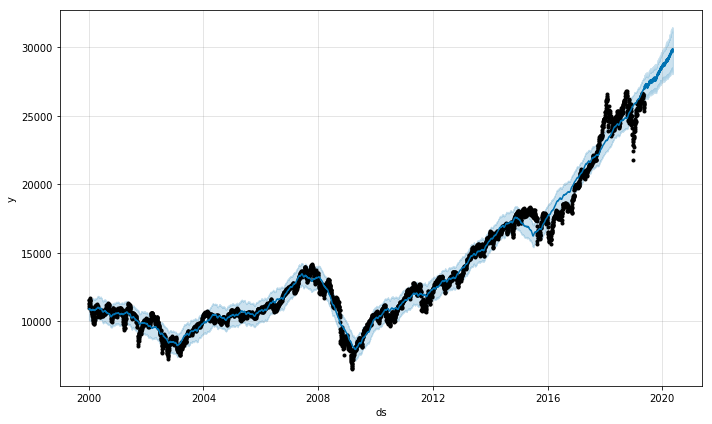

In [36]:
fig1 = m.plot(forecast)

In [37]:

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py
py.plot_mpl(fig)

ValueError: min() arg is an empty sequence

In [15]:
fig = plt.figure(facecolor='w', figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

In [64]:
# Converting to Plotly's Figure object..
plotly_fig = tls.mpl_to_plotly(fig)

ValueError: min() arg is an empty sequence

In [60]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(fig['layout'])

TypeError: 'Figure' object is not subscriptable

In [55]:
# Converting to Plotly's Figure object..
plotly_fig = tls.mpl_to_plotly(fig)

NameError: name 'fig' is not defined

NameError: name 'AutoDateLocator' is not defined

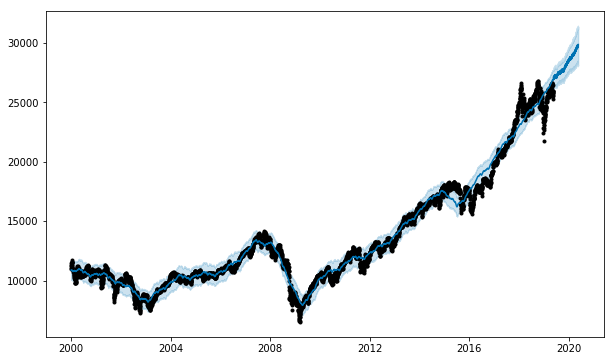

In [18]:
fig1 = plot(m, forecast)

In [19]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py

py.sign_in('DemoAccount', 'lr1c37zw81')

n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

plot_url = py.plot_mpl(fig)


NameError: name 'fig1' is not defined

In [44]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [56]:
%matplotlib inline 
import pprint
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Plotly
import plotly.plotly as py
import plotly.tools as tls

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import base64
def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    return "data:image/png;base64,{}".format(encoded)
# app_iplot = dash.Dash()

# app_iplot.layout = html.Div([
#     dcc.Input(id='plot_title', value='Type title...', type="text"),
#     dcc.Slider(
#         id='box_size',
#         min=1,
#         max=10,
#         value=4,
#         step=1,
#         marks=list(range(0, 10))
#     ),
#     html.Div([html.Img(id = 'cur_plot', src = '')],
#              id='plot_div')
# ])

# @app_iplot.callback(
#     Output(component_id='cur_plot', component_property='src'),
#     [Input(component_id='plot_title', component_property='value'), Input(component_id = 'box_size', component_property='value')]
# )
def update_graph(input_value, n_val):
    fig, ax1 = plt.subplots(1,1)
    np.random.seed(len(input_value))
    ax1.matshow(np.random.uniform(-1,1, size = (n_val,n_val)))
    ax1.set_title(input_value)
    out_url = fig_to_uri(fig)
    return out_url

In [ ]:
update_graph()